In [2]:
#importing libraries 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_dir = r'C:\Users\Pranav\Desktop\ANN\Data'

In [4]:
img_size = (128, 128)
batch_size = 32

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [6]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 169 images belonging to 2 classes.


In [7]:
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 41 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_data, validation_data=val_data, epochs=10)

C:\Users\Pranav\anaconda3\ana\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.5299 - loss: 0.7842 - val_accuracy: 0.7561 - val_loss: 0.6686
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.7133 - loss: 0.6593 - val_accuracy: 0.6829 - val_loss: 0.6515
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.6541 - loss: 0.6332 - val_accuracy: 0.7073 - val_loss: 0.6138
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.7381 - loss: 0.5399 - val_accuracy: 0.6585 - val_loss: 0.5818
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.7366 - loss: 0.5235 - val_accuracy: 0.7317 - val_loss: 0.6666
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.7563 - loss: 0.5304 - val_accuracy: 0.7561 - val_loss: 0.4991
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.9218 - loss: 0.3522 - val_accuracy: 0.7561 - val_loss: 0.4497
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.8746 - loss: 0.3265 - val_accuracy: 0.7317 - val_loss: 0.6479
Epoch 9/

In [11]:
classes = train_data.class_indices
inv_classes = {v: k for k, v in classes.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


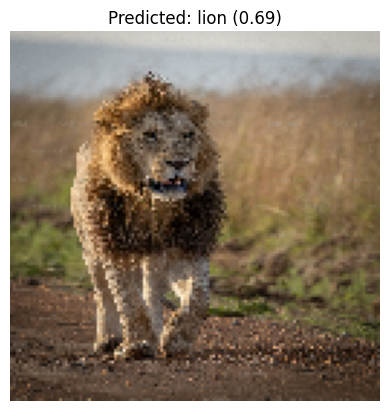

In [15]:
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np

data_dir = r'C:\Users\Pranav\Desktop\ANN\Data'
img_size = (128, 128)

# Use your trained model (assumes it exists in memory or load it if saved)
# model = tf.keras.models.load_model("lion_elephant_cnn_model.h5")

classes = {'elephant': 0, 'lion': 1}
inv_classes = {v: k for k, v in classes.items()}

# Select and predict random image
test_class = random.choice(list(classes.keys()))
folder = os.path.join(data_dir, test_class)
test_img_file = random.choice(os.listdir(folder))
test_img_path = os.path.join(folder, test_img_file)

img = image.load_img(test_img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)[0][0]
predicted_class = inv_classes[int(prediction > 0.5)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({prediction:.2f})")
plt.axis('off')
plt.show()


In [17]:
model.save("lion_elephant_cnn_model.keras")

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,439,125 (9.30 MB)

 Trainable params: 813,041 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,084 (6.20 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


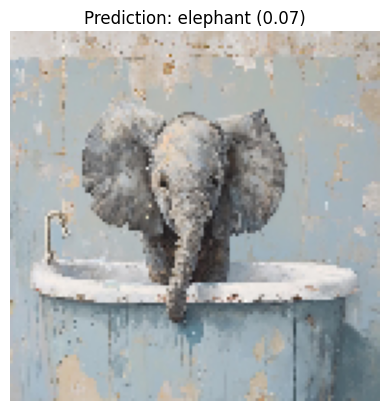

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

class_names = ['elephant', 'lion']

# Path to external image (not used in training)
img_path = r"C:\Users\Pranav\Downloads\elephant-8608983_1280.jpg"  # change this to your image path

img = image.load_img(img_path, target_size=(128, 128)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array = img_array / 255.0  

prediction = model.predict(img_array)[0][0]

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_names[1] if prediction >= 0.5 else class_names[0]} ({prediction:.2f})")
plt.show()
